In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [2]:
ds=pd.read_csv("WineQT.csv")

In [3]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
ds.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [6]:
ds.shape

(1143, 13)

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [10]:
ds = ds.drop(['density', 'Id'], axis=1)

In [11]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5


<Axes: xlabel='quality', ylabel='count'>

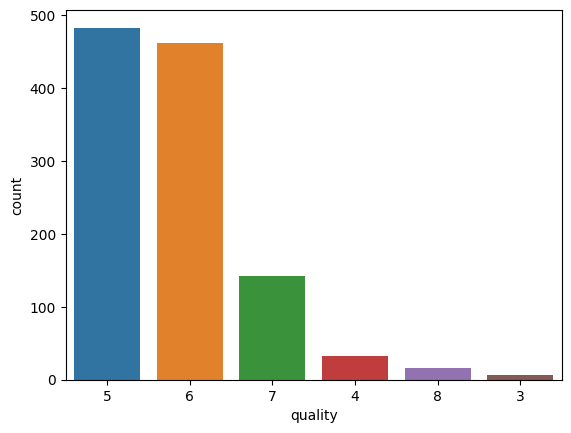

In [12]:
sns.countplot(x = 'quality', data=ds, order = ds['quality'].value_counts().index)

In [13]:
ds.duplicated().sum()

125

In [14]:
ds.groupby('quality').size()

quality
3      6
4     33
5    483
6    462
7    143
8     16
dtype: int64

In [15]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
ds_3 = ds[(ds['quality']==3)] 
ds_4 = ds[(ds['quality']==4)] 
ds_5 = ds[(ds['quality']==5)]
ds_6 = ds[(ds['quality']==6)]
ds_7 = ds[(ds['quality']==7)]
ds_8 = ds[(ds['quality']==8)]
# upsample minority class
ds_3_upsampled = resample(ds_3, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)  # reproducible results
ds_4_upsampled = resample(ds_4, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)  # reproducible results
ds_6_upsampled = resample(ds_6, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)  # reproducible results
ds_7_upsampled = resample(ds_7, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)  # reproducible results
ds_8_upsampled = resample(ds_8, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
ds = pd.concat([ds_3_upsampled,ds_4_upsampled, ds_5,ds_6_upsampled,ds_7_upsampled,ds_8_upsampled])

In [16]:
ds.groupby('quality').size()

quality
3    483
4    483
5    483
6    483
7    483
8    483
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

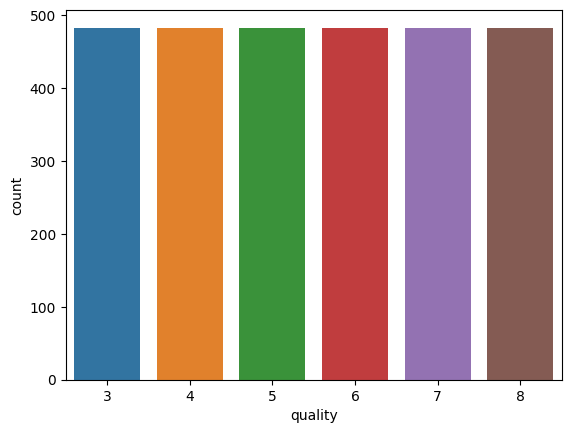

In [17]:
sns.countplot(x = 'quality', data=ds, order = ds['quality'].value_counts().index)

In [24]:
x = ds.iloc[:,0:10].values
y = ds.iloc[:,-1].values

In [28]:
x

array([[ 7.3  ,  0.98 ,  0.05 , ...,  3.31 ,  0.55 ,  9.7  ],
       [ 7.1  ,  0.875,  0.05 , ...,  3.4  ,  0.52 , 10.2  ],
       [ 7.6  ,  1.58 ,  0.   , ...,  3.5  ,  0.4  , 10.9  ],
       ...,
       [ 7.9  ,  0.54 ,  0.34 , ...,  3.2  ,  0.72 , 13.1  ],
       [ 7.2  ,  0.33 ,  0.33 , ...,  3.23 ,  1.1  , 10.   ],
       [ 8.6  ,  0.42 ,  0.39 , ...,  3.35 ,  0.69 , 11.7  ]])

In [26]:
y

array([3, 3, 3, ..., 8, 8, 8], dtype=int64)

In [30]:
x.shape

(2898, 10)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [32]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (2028, 10)
y_train:  (2028,)
x_test:  (870, 10)
y_test:  (870,)


## logistic regression

In [33]:
model_lr = LogisticRegression(max_iter = 600)

In [34]:
model_lr.fit(x_train, y_train)

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=600)

In [35]:
y_pred_lr = model_lr.predict(x_test)

In [36]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.5413793103448276


## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model_knn = KNeighborsClassifier()

In [39]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred_knn = model_knn.predict(x_test)

In [41]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.7850574712643679


## decision tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model_dt = DecisionTreeClassifier()

In [44]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred_dt = model_dt.predict(x_test)

In [46]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.8942528735632184


## Naive Bayes Classifier

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
model_nb = GaussianNB()

In [49]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [50]:
y_pred_nb = model_nb.predict(x_test)

In [51]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.5333333333333333


##  Support Vector Machine

In [52]:
from sklearn.svm import SVC

In [53]:
model_svc = SVC(gamma='auto')

In [54]:
model_svc.fit(x_train,y_train)

SVC(gamma='auto')

In [55]:
y_pred_svc = model_nb.predict(x_test)

In [56]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.5333333333333333


## Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [59]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [60]:
y_pred_rf = model_nb.predict(x_test)

In [61]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.5333333333333333


In [62]:
Xnew = [[7.5,0.80,0.1,1.9,0.075,11.0,34.0,3.51,0.57,9.5]]

ynew = model_dt.predict(Xnew)

print(ynew)

[5]
